<a href="https://colab.research.google.com/github/qkrtiger/Python/blob/main/pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
path = 'https://github.com/dongupak/DataML/raw/main/csv/'
weather_file = path + 'weather.csv'

weather = pd.read_csv(weather_file, index_col = 0, encoding='CP949')
print(weather.head(3))
print('weather 데이터의 shape : ', weather.shape)
print(weather.describe()) # 데이터가 담고 있는 내용을 분석
weather.count() #  개별적인 열의 개수를 알 수 있다

# 결손값 : 어떤 이유로 인해 날씨 데이터를 수집하는 중 값이 입력되지 못하면 그 항목이 비어 있을 수 있음
# insa() : 결손값이 있는지 boolean 값으로 반환하는 메소드
missing_data = weather[weather['평균풍속'].isna()]
print(missing_data)

print('------------------------------------------')
# fillna() : 결손값을 다른 값으로 교체하는 메소드
weather.fillna(0, inplace = True)
print(weather.loc['2012-02-11'])

# 이전 코드는 fillna(0,...)을 통해 0으로 채움, 다음은 평균으로 채움
# 이전 코드 시행 후 아래 코드를 실행하면 이전 코드의 영향을 받음
# 커널 재시작을 하고 실행할 것
weather.fillna(weather['평균풍속'].mean(), inplace = True)
print(weather.loc['2012-02-11'])

print('------------------------------------------')
weather = pd.read_csv(weather_file, encoding='CP949')
weather['일시'] = pd.DatetimeIndex(weather['일시']).year
weather

            평균기온  최대풍속  평균풍속
일시                          
2010-08-01  28.7   8.3   3.4
2010-08-02  25.2   8.7   3.8
2010-08-03  22.1   6.3   2.9
weather 데이터의 shape :  (3653, 3)
              평균기온         최대풍속         평균풍속
count  3653.000000  3649.000000  3647.000000
mean     12.942102     7.911099     3.936441
std       8.538507     3.029862     1.888473
min      -9.000000     2.000000     0.200000
25%       5.400000     5.700000     2.500000
50%      13.800000     7.600000     3.600000
75%      20.100000     9.700000     5.000000
max      31.300000    26.000000    14.900000
            평균기온  최대풍속  평균풍속
일시                          
2012-02-11  -0.7   NaN   NaN
2012-02-12   0.4   NaN   NaN
2012-02-13   4.0   NaN   NaN
2015-03-22  10.1  11.6   NaN
2015-04-01   7.3  12.1   NaN
2019-04-18  15.7  11.7   NaN
------------------------------------------
평균기온   -0.7
최대풍속    0.0
평균풍속    0.0
Name: 2012-02-11, dtype: float64
평균기온   -0.7
최대풍속    0.0
평균풍속    0.0
Name: 2012-02-11, dtype: float64
-----

,일시,평균기온,최대풍속,평균풍속
0,2010,28.7,8.3,3.4
1,2010,25.2,8.7,3.8
2,2010,22.1,6.3,2.9
3,2010,25.3,6.6,4.2
4,2010,27.2,9.1,5.6
...,...,...,...,...
3648,2020,22.1,4.2,1.7
3649,2020,21.9,4.5,1.6
3650,2020,21.6,3.2,1.0
3651,2020,22.9,9.7,2.4


              일시  평균기온  최대풍속  평균풍속  month
0     2010-08-01  28.7   8.3   3.4      8
1     2010-08-02  25.2   8.7   3.8      8
2     2010-08-03  22.1   6.3   2.9      8
3     2010-08-04  25.3   6.6   4.2      8
4     2010-08-05  27.2   9.1   5.6      8
...          ...   ...   ...   ...    ...
3648  2020-07-27  22.1   4.2   1.7      7
3649  2020-07-28  21.9   4.5   1.6      7
3650  2020-07-29  21.6   3.2   1.0      7
3651  2020-07-30  22.9   9.7   2.4      7
3652  2020-07-31  25.7   4.8   2.5      7

[3653 rows x 5 columns]
            평균기온      최대풍속      평균풍속
month                               
1       1.598387  8.158065  3.757419
2       2.136396  8.225357  3.946786
3       6.250323  8.871935  4.390291
4      11.064667  9.305017  4.622483
5      16.564194  8.548710  4.219355
6      19.616667  6.945667  3.461000
7      23.328387  7.322581  3.877419
8      24.748710  6.853226  3.596129
9      20.323667  6.896333  3.661667
10     15.383871  7.766774  3.961613
11      9.889667  8.013333 

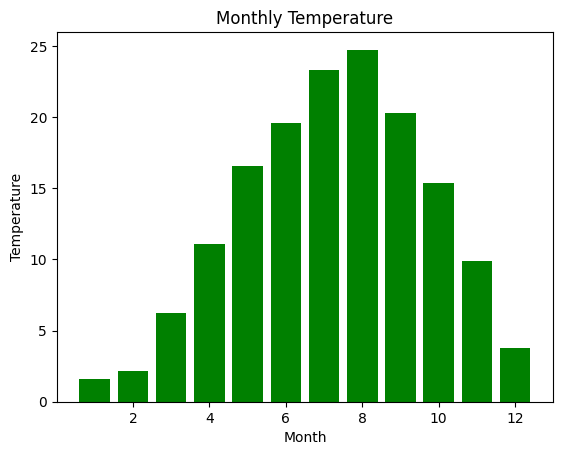

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

weather = pd.read_csv(weather_file, encoding='CP949')
weather['month'] = pd.DatetimeIndex(weather['일시']).month

monthly = [None for x in range(12)] # 달별로 구분된 12개의 None 값
monthly_wind = [0 for x in range(12)] # 각 달의 평균 풍속을 담을 리스트
for i in range(12):
    monthly[i] = weather[weather['month'] == i + 1] # 달별로 분리
    monthly_wind[i] = monthly[i]['평균기온'].mean() # 개별 데이터 분석

months = np.arange(1, 13) # 1에서 12월의 연속된 수를 생성
plt.bar(months, monthly_wind, color='green')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.title('Monthly Temperature')

# 새로운 'month' 열을 만든다
weather['month'] = pd.DatetimeIndex(weather['일시']).month
print(weather)

# numeric_only = True라는 키워드 인자를 통해서 일시 열을 계산에서 제외
# 'month'를 기준으로 묶고 평균을 구함
monthly_means = weather.groupby('month').mean(numeric_only = True)
print(monthly_means)

In [20]:
df = pd.DataFrame({'상품' : ['시계', '반지', '반지', '목걸이', '팔찌'],
                   '재질': ['금', '은', '백금', '금', '은'],
                   '가격' : [500000, 20000, 350000, 30000, 60000]})

df

# 데이터 구조를 변경하는 pivot()
new_df = df.pivot(index = '상품', columns = '재질', values = '가격')
new_df.fillna(value=0)

재질,금,백금,은
상품,,,
목걸이,30000.0,0.0,0.0
반지,0.0,350000.0,20000.0
시계,500000.0,0.0,0.0
팔찌,0.0,0.0,60000.0
